In [174]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('kospi_reg_train_2.csv')
test = pd.read_csv('kospi_reg_test_2.csv')

In [175]:
print(train.shape)
print(test.shape)

(434, 111)
(112, 111)


In [176]:
from pycaret.regression import *

In [177]:
#clf = setup(data = train, target = 'kospi_close', feature_selection = True, remove_multicollinearity = True, ignore_low_variance = True)
clf = setup(data = train, target = 'kospi_close', feature_selection = True, ignore_low_variance = True)
# clf = setup(data = train, target = 'kospi_close', feature_selection = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4681
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(434, 111)"
4,Missing Values,False
5,Numeric Features,110
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [178]:
best_3 = compare_models( n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Bayesian Ridge,0.0171,0.0005,0.0225,0.9993,0.0138,-0.0177,0.0401
1,Ridge Regression,0.0244,0.0010,0.0315,0.9986,0.0200,-0.0141,0.0075
2,Extra Trees Regressor,0.0347,0.0024,0.0475,0.9969,0.0291,0.0073,0.2490
3,Orthogonal Matching Pursuit,0.0381,0.0024,0.0485,0.9967,0.0313,-0.0187,0.0067
4,Gradient Boosting Regressor,0.0379,0.0027,0.0512,0.9964,0.0319,-0.0271,0.6056
5,Random Forest,0.0389,0.0029,0.0535,0.9961,0.0332,-0.0142,0.2543
6,Light Gradient Boosting Machine,0.0463,0.0039,0.0611,0.9949,0.0352,-0.0196,0.0493
7,AdaBoost Regressor,0.0528,0.0048,0.0680,0.9935,0.0416,-0.0258,0.3007
8,Extreme Gradient Boosting,0.0459,0.0049,0.0682,0.9930,0.0407,-0.0232,0.1336
9,CatBoost Regressor,0.0555,0.0056,0.0735,0.9927,0.0426,-0.0175,11.3027


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:[BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=4681, solver='auto', tol=0.001), ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4681, verbose=0, warm_start=False)]
INFO:l

In [179]:
blended = blend_models(estimator_list = best_3, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0247,0.0012,0.0346,0.9982,0.0237,-0.0074
1,0.0238,0.0009,0.0297,0.9991,0.0168,0.0238
2,0.0221,0.0010,0.0322,0.9983,0.0192,-0.0368
3,0.0199,0.0006,0.0250,0.9991,0.0153,-0.0278
4,0.0218,0.0008,0.0281,0.9991,0.0169,0.0557
Mean,0.0225,0.0009,0.0299,0.9988,0.0184,0.0015
SD,0.0017,0.0002,0.0033,0.0004,0.0030,0.0342


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:VotingRegressor(estimators=[('Bayesian Ridge_0',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                 

In [180]:
pred_holdout = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.022,0.0008,0.0286,0.9989,0.0169,0.0113


In [181]:
final_model = finalize_model(blended)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=VotingRegressor(estimators=[('Bayesian Ridge_0',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion=

INFO:logs:finalize_model() succesfully completed......................................


In [182]:
predictions = predict_model(final_model, data = test)

In [183]:
predictions

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,estx_volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200312,-1.895532,1.668250,0.149424,-1.774078,-1.609012,-1.648745,-1.935301,1.252558,1.139815,...,3.590020,-1.368388,2.578821,-0.199093,0.897056,-3.385885,5.293163,-3.259982,6.782740,-1.7443
1,20200313,-2.232368,1.927198,0.047041,-1.953222,-2.492790,-2.126061,-2.611901,2.023790,1.744368,...,6.372153,-1.489230,5.052050,-0.351370,1.472436,-3.218209,4.143986,-3.099057,6.145341,-2.0087
2,20200317,-2.762608,2.412725,-0.114409,-2.311509,-2.930374,-2.594799,-2.837786,0.416131,0.671590,...,4.972999,-1.825807,2.421673,-0.806548,0.880393,-3.446436,3.037404,-3.483895,4.134980,-2.3632
3,20200318,-3.197725,2.833515,-0.248294,-2.580224,-2.688270,-2.752348,-3.085034,0.742372,0.632780,...,4.099539,-2.251095,3.241981,-1.021434,0.734342,-4.041172,2.712976,-4.004192,3.361080,-2.6342
4,20200319,-3.913066,3.675096,-0.466842,-3.117655,-3.009240,-3.120759,-3.887107,1.783566,1.321895,...,4.977043,-2.506068,5.240764,-1.133876,0.843145,-3.760575,2.830160,-3.692366,3.768760,-3.0744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20200911,1.116442,-0.306228,2.789720,0.375645,1.073975,1.067538,1.054510,1.388240,1.361790,...,0.043609,-1.283393,-0.880316,1.223459,0.053101,-0.218257,0.409873,-0.561783,-0.438005,0.8757
108,20200914,1.283654,-0.370965,2.862570,0.465217,1.226734,1.238605,1.249040,1.722713,1.348007,...,-0.421427,-1.223458,-1.185136,1.301449,-0.023355,-0.214229,0.034714,-0.518571,-0.812224,1.0050
109,20200915,1.367582,-0.435702,2.899979,0.465217,1.313673,1.322754,1.317779,1.250990,1.295017,...,-0.567004,-1.182991,-0.275303,1.372674,-0.182148,-0.150636,0.208688,-0.454635,-0.374584,1.0551


In [184]:
score = predictions[['kospi_close', 'Label']]
score.to_csv('kospi_score_reg.csv', index = False)
score.head()

,kospi_close,Label
index,,
0,-1.895532,-1.7443
1,-2.232368,-2.0087
2,-2.762608,-2.3632
3,-3.197725,-2.6342
4,-3.913066,-3.0744


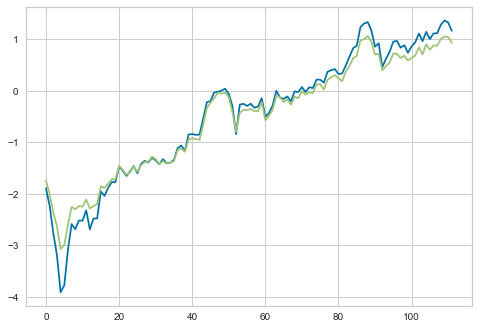

In [185]:
plt.plot(score)

In [ ]:
# lightgbm

In [186]:
lgbm  = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0356,0.0022,0.0472,0.9962,0.0296,-0.0346
1,0.0442,0.0041,0.0639,0.9946,0.0442,-0.0108
2,0.0420,0.0031,0.0555,0.9966,0.0294,0.0080
3,0.0646,0.0083,0.0909,0.9921,0.0449,-0.1026
4,0.0465,0.0043,0.0655,0.9914,0.0391,-0.0861
5,0.0408,0.0022,0.0473,0.9968,0.0293,-0.0275
6,0.0480,0.0034,0.0581,0.9947,0.0357,-0.0198
7,0.0359,0.0023,0.0483,0.9968,0.0272,-0.0323
8,0.0406,0.0031,0.0560,0.9962,0.0332,-0.1901
9,0.0648,0.0061,0.0780,0.9940,0.0399,0.2994


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4681, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [187]:
tuned_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0360,0.0022,0.0474,0.9962,0.0301,-0.0302
1,0.0849,0.0148,0.1218,0.9805,0.0688,-0.0030
2,0.0633,0.0065,0.0807,0.9928,0.0432,0.0361
3,0.0990,0.0237,0.1540,0.9772,0.0672,-0.1290
4,0.0595,0.0082,0.0905,0.9836,0.0551,-0.2232
5,0.0560,0.0067,0.0819,0.9904,0.0423,-0.0641
6,0.0599,0.0068,0.0826,0.9892,0.0449,-0.0460
7,0.0443,0.0041,0.0639,0.9944,0.0358,-0.0899
8,0.0597,0.0084,0.0914,0.9900,0.0482,-0.2385
9,0.0750,0.0115,0.1073,0.9887,0.0478,0.1822


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=90, n_jobs=-1, num_leaves=40, objective=None,
              random_state=4681, reg_alpha=0.4, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


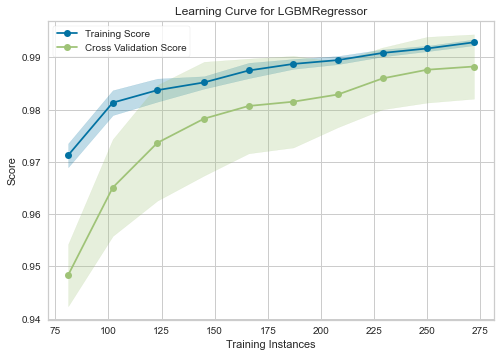

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [188]:
plot_model(tuned_lgbm, plot = 'learning')

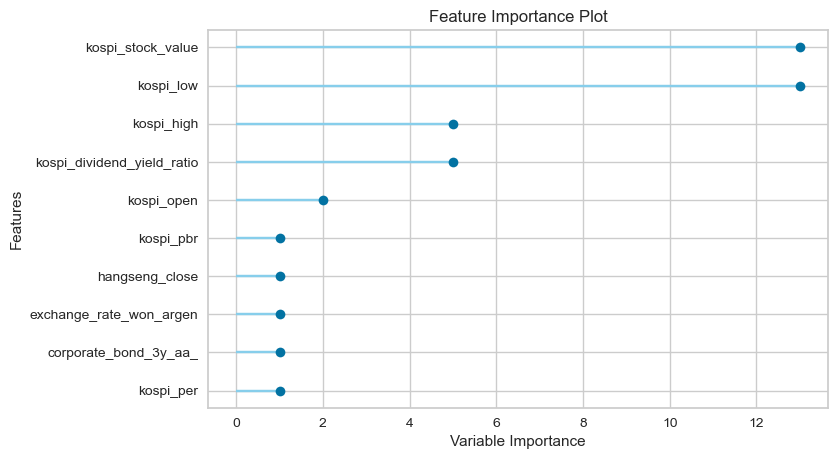

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [189]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

In [190]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [191]:
predict_model(tuned_lgbm, data=test)

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,estx_volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200312,-1.895532,1.668250,0.149424,-1.774078,-1.609012,-1.648745,-1.935301,1.252558,1.139815,...,3.590020,-1.368388,2.578821,-0.199093,0.897056,-3.385885,5.293163,-3.259982,6.782740,-1.1908
1,20200313,-2.232368,1.927198,0.047041,-1.953222,-2.492790,-2.126061,-2.611901,2.023790,1.744368,...,6.372153,-1.489230,5.052050,-0.351370,1.472436,-3.218209,4.143986,-3.099057,6.145341,-1.1371
2,20200317,-2.762608,2.412725,-0.114409,-2.311509,-2.930374,-2.594799,-2.837786,0.416131,0.671590,...,4.972999,-1.825807,2.421673,-0.806548,0.880393,-3.446436,3.037404,-3.483895,4.134980,-1.1371
3,20200318,-3.197725,2.833515,-0.248294,-2.580224,-2.688270,-2.752348,-3.085034,0.742372,0.632780,...,4.099539,-2.251095,3.241981,-1.021434,0.734342,-4.041172,2.712976,-4.004192,3.361080,-1.1371
4,20200319,-3.913066,3.675096,-0.466842,-3.117655,-3.009240,-3.120759,-3.887107,1.783566,1.321895,...,4.977043,-2.506068,5.240764,-1.133876,0.843145,-3.760575,2.830160,-3.692366,3.768760,-1.1371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20200911,1.116442,-0.306228,2.789720,0.375645,1.073975,1.067538,1.054510,1.388240,1.361790,...,0.043609,-1.283393,-0.880316,1.223459,0.053101,-0.218257,0.409873,-0.561783,-0.438005,0.7577
108,20200914,1.283654,-0.370965,2.862570,0.465217,1.226734,1.238605,1.249040,1.722713,1.348007,...,-0.421427,-1.223458,-1.185136,1.301449,-0.023355,-0.214229,0.034714,-0.518571,-0.812224,1.0612
109,20200915,1.367582,-0.435702,2.899979,0.465217,1.313673,1.322754,1.317779,1.250990,1.295017,...,-0.567004,-1.182991,-0.275303,1.372674,-0.182148,-0.150636,0.208688,-0.454635,-0.374584,1.0612


In [192]:
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,estx_volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200312,-1.895532,1.668250,0.149424,-1.774078,-1.609012,-1.648745,-1.935301,1.252558,1.139815,...,3.590020,-1.368388,2.578821,-0.199093,0.897056,-3.385885,5.293163,-3.259982,6.782740,-1.1908
1,20200313,-2.232368,1.927198,0.047041,-1.953222,-2.492790,-2.126061,-2.611901,2.023790,1.744368,...,6.372153,-1.489230,5.052050,-0.351370,1.472436,-3.218209,4.143986,-3.099057,6.145341,-1.1371
2,20200317,-2.762608,2.412725,-0.114409,-2.311509,-2.930374,-2.594799,-2.837786,0.416131,0.671590,...,4.972999,-1.825807,2.421673,-0.806548,0.880393,-3.446436,3.037404,-3.483895,4.134980,-1.1371
3,20200318,-3.197725,2.833515,-0.248294,-2.580224,-2.688270,-2.752348,-3.085034,0.742372,0.632780,...,4.099539,-2.251095,3.241981,-1.021434,0.734342,-4.041172,2.712976,-4.004192,3.361080,-1.1371
4,20200319,-3.913066,3.675096,-0.466842,-3.117655,-3.009240,-3.120759,-3.887107,1.783566,1.321895,...,4.977043,-2.506068,5.240764,-1.133876,0.843145,-3.760575,2.830160,-3.692366,3.768760,-1.1371


In [193]:
score = predictions[['kospi_close', 'Label']]
score.to_csv('kospi_score_reg.csv', index = False)
score.head()

,kospi_close,Label
index,,
0,-1.895532,-1.1908
1,-2.232368,-1.1371
2,-2.762608,-1.1371
3,-3.197725,-1.1371
4,-3.913066,-1.1371


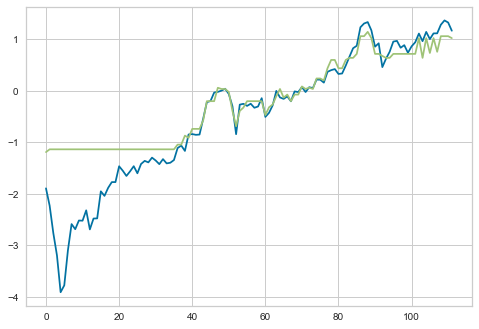

In [194]:
plt.plot(score)